# PROBLEM STATEMENT : Build a predictive model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

# GOAL : Achieve precision farming by optimizing the agricultural production.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
data = pd.read_csv("Agriculture.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape   #checking the shape of dataset

(2200, 8)

In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
#checking dataset if it contain null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
#Average climatic conditions
print("Average ratio of Nitrogen in the soil :{0:.2f}".format(data['N'].mean()))
print("Average ratio of Phosphorus in the soil :{0:.2f}".format(data['P'].mean()))
print("Average ratio of Potassium in the soil :{0:.2f}".format(data['K'].mean()))
print("Average Temperature in celsius :{0:.2f}".format(data['temperature'].mean()))
print("Average Relative humidity in % :{0:.2f}".format(data['humidity'].mean()))
print("Average Ph value of the soil :{0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm :{0:.2f}".format(data['rainfall'].mean()))

Average ratio of Nitrogen in the soil :50.55
Average ratio of Phosphorus in the soil :53.36
Average ratio of Potassium in the soil :48.15
Average Temperature in celsius :25.62
Average Relative humidity in % :71.48
Average Ph value of the soil :6.47
Average Rainfall in mm :103.46


In [10]:
# checking summary statistics for each of the crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("--------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen Required",x['N'].min())
    print("Average Nitrogen Required",x['N'].mean())
    print("Maximum Nitrogen Required",x['N'].max())
    print("--------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus Required",x['P'].min())
    print("Average Phosphorus Required",x['P'].mean())
    print("Maximum Phosphorus Required",x['P'].max())
    print("--------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium Required",x['K'].min())
    print("Average Potassium Required",x['K'].mean())
    print("Maximum Potassium Required",x['K'].max())
    print("--------------------------------------")
    print("Statistics for temperature")
    print("Minimum Temperature Required :{0:.2f}".format(x['temperature'].min()))
    print("Average Temperature Required :{0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required :{0:.2f}".format(x['temperature'].max()))
    print("--------------------------------------")
    print("Statistics for Ph")
    print("Minimum Ph Required :{0:.2f}".format(x['ph'].min()))
    print("Average Ph Required :{0:.2f}".format(x['ph'].mean()))
    print("Maximum Ph Required :{0:.2f}".format(x['ph'].max()))
    print("Statistics for Humidity")
    print("Minimum Humidity Required :{0:.2f}".format(x['humidity'].min()))
    print("Average Humidity Required :{0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required :{0:.2f}".format(x['humidity'].max()))
    print("--------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall Required :{0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required :{0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required :{0:.2f}".format(x['rainfall'].max()))
    
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [11]:
# comparing the average requirements for each crops with average conditions

@interact
def compare(conditions =['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for",conditions,"is{0:.2f}".format(data[conditions].mean()))
    print("--------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label']=='rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[(data['label']=='blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label']=='banana')][conditions].mean()))
    print("Jute: {0:.2f}".format(data[(data['label']=='jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label']=='coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label']=='apple')][conditions].mean()))
    print("Papaya: {0:.2f}".format(data[(data['label']=='papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label']=='muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label']=='grapes')][conditions].mean()))
    print("Watermelon: {0:.2f}".format(data[(data['label']=='watermelon')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label']=='mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label']=='orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label']=='chickpea')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label']=='lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label']=='cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label']=='maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label']=='mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label']=='mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label']=='pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label']=='coffee')][conditions].mean()))
    


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [12]:
@interact
def compare(conditions =['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average",conditions)
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("--------------------------------------")
    print("Crops which require less than average",conditions)
    print(data[data[conditions] < data[conditions].mean()]['label'].unique())


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\Sankalp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sankalp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sankalp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

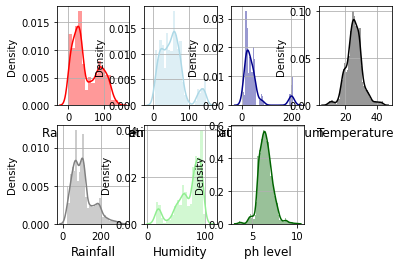

In [13]:
#Distribution plot

plt.subplot(2,4,1)
sns.distplot(data['N'],color = 'red')
plt.xlabel('Ratio of Nitrogen',fontsize = 12)
plt.grid()
plt.subplot(2,4,2)
sns.distplot(data['P'],color = 'lightblue')
plt.xlabel('Ratio of Phosphorus',fontsize = 12)
plt.grid()
plt.subplot(2,4,3)
sns.distplot(data['K'],color = 'darkblue')
plt.xlabel('Ratio of potassium',fontsize = 12)
plt.grid()
plt.subplot(2,4,4)
sns.distplot(data['temperature'],color = 'black')
plt.xlabel('Temperature',fontsize = 12)
plt.grid()
plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color = 'grey')
plt.xlabel('Rainfall',fontsize = 12)
plt.grid()
plt.subplot(2,4,6)
sns.distplot(data['humidity'],color = 'lightgreen')
plt.xlabel('Humidity',fontsize = 12)
plt.grid()
plt.subplot(2,4,7)
sns.distplot(data['ph'],color = 'darkgreen')
plt.xlabel('ph level',fontsize = 12)
plt.grid()

In [14]:
print("Some Interesting Patterns")
print("--------------------------------------")
print("Crops Which Require Very High Ratio Of Nitrogen In The Soil:",data[data['N']>120]['label'].unique())
print("Crops Which Require Very High Ratio Of Phosphorus In The Soil:",data[data['P']>100]['label'].unique())
print("Crops Which Require Very High Ratio Of Potassium In The Soil:",data[data['K']>200]['label'].unique())
print("Crops Which Require Very High Rainfall:",data[data['rainfall']>200]['label'].unique())
print("Crops Which Require Very High Temperature:",data[data['temperature']>40]['label'].unique())
print("Crops Which Require Very Low Temperature:",data[data['temperature']<10]['label'].unique())
print("Crops Which Require Very Low Humidity:",data[data['humidity']<20]['label'].unique())
print("Crops Which Require Very High Ph:",data[data['ph']>9]['label'].unique())
print("Crops Which Require Very Low Ph:",data[data['ph']<4]['label'].unique())

Some Interesting Patterns
--------------------------------------
Crops Which Require Very High Ratio Of Nitrogen In The Soil: ['cotton']
Crops Which Require Very High Ratio Of Phosphorus In The Soil: ['grapes' 'apple']
Crops Which Require Very High Ratio Of Potassium In The Soil: ['grapes' 'apple']
Crops Which Require Very High Rainfall: ['rice' 'papaya' 'coconut']
Crops Which Require Very High Temperature: ['grapes' 'papaya']
Crops Which Require Very Low Temperature: ['grapes']
Crops Which Require Very Low Humidity: ['chickpea' 'kidneybeans']
Crops Which Require Very High Ph: ['mothbeans']
Crops Which Require Very Low Ph: ['mothbeans']


In [15]:
# Understanding which crops can be grown in which season according to temperature,humidity and rainfall.....

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("--------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("--------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
--------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Clustering Analysis

In [16]:
from sklearn.cluster import KMeans

#removing the labels column

x = data.drop(['label'],axis =1)

#selecting all the values of the data

x = x.values

x.shape

(2200, 7)

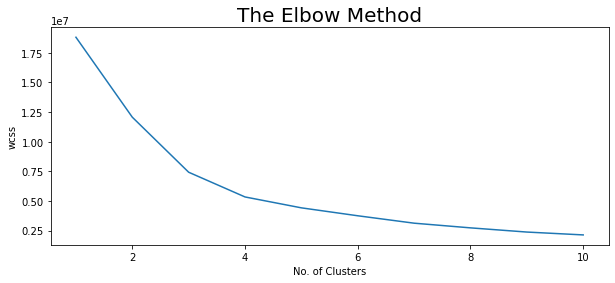

In [17]:
# Determinig the optimum number of clusters within datasets

plt.rcParams['figure.figsize'] =(10,4)

wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters= i , init='k-means++', max_iter=300 , n_init=10 , random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
#plotting the result
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
        

In [18]:
# Implementing K Means algorithm to perform clustering analysis

km = KMeans(n_clusters= 4, init='k-means++', max_iter=300 , n_init=10 , random_state=0)
y_means = km.fit_predict(x)

#Finding the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis =1)
z = z.rename(columns = {0:'cluster'})

# checking clusters of each crops
print("Let's check the result after applying K Means Clustering Anlysis ")
print("--------------------------------------")
print("Crops in First Cluster:",z[z['cluster']==0]['label'].unique())
print("--------------------------------------")
print("Crops in Second Cluster:",z[z['cluster']==1]['label'].unique())
print("--------------------------------------")
print("Crops in Third Cluster:",z[z['cluster']==2]['label'].unique())
print("--------------------------------------")
print("Crops in Fourth Cluster:",z[z['cluster']==3]['label'].unique())



Let's check the result after applying K Means Clustering Anlysis 
--------------------------------------
Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
--------------------------------------
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


# Predictive Modelling

In [19]:
# Splitting the dataset for predictive modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [20]:
# splitting our dataset for testing & training

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)
print("The Shape Of X Train:",x_train.shape)
print("The Shape Of Y Test:",x_test.shape)
print("The Shape Of Y Train:",y_train.shape)
print("The Shape Of Y Test:",y_test.shape)

The Shape Of X Train: (1760, 7)
The Shape Of Y Test: (440, 7)
The Shape Of Y Train: (1760,)
The Shape Of Y Test: (440,)


In [21]:
# Creating Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\Sankalp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


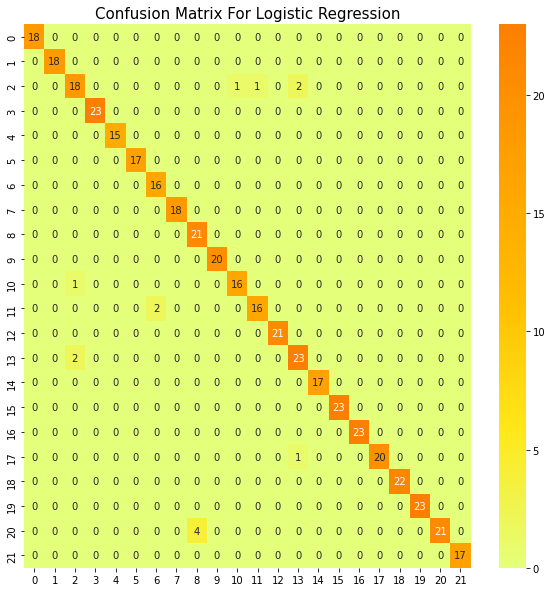

In [22]:
#Evaluating Model Performance

from sklearn.metrics import confusion_matrix

#printing confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True,cmap='Wistia')
plt.title('Confusion Matrix For Logistic Regression',fontsize = 15)
plt.show()

In [23]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [24]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
prediction = model.predict((np.array([[85,
                                      44,
                                      40,
                                      20,
                                      80,
                                      7,
                                      220]])))
print("The Suggested Crop A/c to Given Climatic Condition:",prediction)

The Suggested Crop A/c to Given Climatic Condition: ['rice']


C:\Users\Sankalp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
